Bu projede rastgele oluşturulmuş 100 inceleme verisi üzerinde duygu analizi gerçekleştirilmiştir. Amaç, bir yorumun olumlu (POSITIVE) mu yoksa olumsuz (NEGATIVE) mu olduğunu tahmin etmektir.

In [2]:
import random
import pandas as pd

positive_reviews = [
    "I love this product! It works perfectly.",
    "Amazing quality and super fast delivery!",
    "Highly recommended, I will buy again.",
    "Five stars, exceeded my expectations.",
    "Great value for the price.",
    "Very satisfied with this purchase.",
    "Easy to use and very effective.",
    "Excellent performance and build quality.",
    "Superb customer service and fast shipping.",
    "This is the best thing I've bought all year!"
]

negative_reviews = [
    "Terrible product. Do not buy.",
    "Very disappointed with the quality.",
    "Stopped working after a week.",
    "Not as described. Waste of money.",
    "Poor build quality and slow shipping.",
    "Would not recommend to anyone.",
    "I regret buying this.",
    "Broke on the first use.",
    "Customer service was unhelpful.",
    "It didn't work at all."
]

# 50 positive + 50 negative
data = []

for _ in range(50):
    data.append({"reviews": random.choice(positive_reviews), "label": "POSITIVE"})
for _ in range(50):
    data.append({"reviews": random.choice(negative_reviews), "label": "NEGATIVE"})

# Shuffle
random.shuffle(data)

# Create DataFrame
df = pd.DataFrame(data)
print(df.head())

                                    reviews     label
0  Amazing quality and super fast delivery!  POSITIVE
1                    It didn't work at all.  NEGATIVE
2             Stopped working after a week.  NEGATIVE
3           Customer service was unhelpful.  NEGATIVE
4     Five stars, exceeded my expectations.  POSITIVE


In [3]:
df.label.value_counts()

,count
label,
POSITIVE,50
NEGATIVE,50


In [4]:
import pandas as pd
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
nltk.download('vader_lexicon') # sentiment analizi için gerekli
nltk.download('stopwords') # stopwords için gerekli
nltk.download('wordnet') # lemmatization için gerekli
nltk.download('punkt_tab') # tokenizer için gerekli

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Text Cleaning

In [8]:

# text cleaning & preprocessing:

def clean_preprocess_text(text):
  # tokenize:
  tokens = word_tokenize(text.lower())

  # stopwords:
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # lemmatize:
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

  # join words:
  processed_text = ' '.join(lemmatized_tokens)

  return processed_text


df["reviews_clean"] = df["reviews"].apply(clean_preprocess_text)
df.head()

,reviews,label,reviews_clean
0,Amazing quality and super fast delivery!,POSITIVE,amazing quality super fast delivery !
1,It didn't work at all.,NEGATIVE,n't work .
2,Stopped working after a week.,NEGATIVE,stopped working week .
3,Customer service was unhelpful.,NEGATIVE,customer service unhelpful .
4,"Five stars, exceeded my expectations.",POSITIVE,"five star , exceeded expectation ."


Bu adımda, yorum metinlerini analiz için daha uygun hale getirmek amacıyla ön işleme uyguladım. Her metin küçük harfe çevrildi, noktalama işaretlerinden arındırıldı, stopword'ler çıkarıldı ve kelimeler lemmatize edilerek kök hâline indirildi. Temizlenen metinler yeni bir sütunda saklandı.

## Sentiment Analysis

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    return compound

df["sentiment_score"] = df["reviews_clean"].apply(get_sentiment_label)
df.head()




,reviews,label,reviews_clean,sentiment_score
0,Amazing quality and super fast delivery!,POSITIVE,amazing quality super fast delivery !,0.8398
1,It didn't work at all.,NEGATIVE,n't work .,0.0000
2,Stopped working after a week.,NEGATIVE,stopped working week .,-0.2263
3,Customer service was unhelpful.,NEGATIVE,customer service unhelpful .,0.0000
4,"Five stars, exceeded my expectations.",POSITIVE,"five star , exceeded expectation .",0.0000


Bu adımda, her bir temizlenmiş yoruma SentimentIntensityAnalyzer ile duygu skoru (compound) atadım. Bu skor, yorumun genel duygu tonunu sayısal olarak temsil eder; pozitif değerler olumlu, negatif değerler olumsuz eğilimi gösterir. Skorlar yeni bir sütunda saklandı.

In [10]:
def get_sentiment_label(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    return int(compound >= 0.05)

df["sentiment"] = df["reviews_clean"].apply(get_sentiment_label)
df.head()

,reviews,label,reviews_clean,sentiment_score,sentiment
0,Amazing quality and super fast delivery!,POSITIVE,amazing quality super fast delivery !,0.8398,1
1,It didn't work at all.,NEGATIVE,n't work .,0.0000,0
2,Stopped working after a week.,NEGATIVE,stopped working week .,-0.2263,0
3,Customer service was unhelpful.,NEGATIVE,customer service unhelpful .,0.0000,0
4,"Five stars, exceeded my expectations.",POSITIVE,"five star , exceeded expectation .",0.0000,0


Bu adımda, compound skorunu kullanarak yorumları ikili duygu etiketine dönüştürdüm. Compound skoru 0.05 ve üzeri olan yorumlar 1 (olumlu), altında olanlar 0 (olumsuz) olarak etiketlendi. Böylece her yoruma otomatik bir duygu sınıfı atanmış oldu.

In [12]:
df["label"] = df["label"].map({"NEGATIVE": 0, "POSITIVE": 1})

labeldaki string değerleri numerik olarak ifade ettim positif 1 negatif 0 olacak şekilde


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(df["label"], df["sentiment"])
print(f"Confusion Matrix:\n{cm}")

# Ek olarak performans raporu da istersen:
print("\nClassification Report:")
print(classification_report(df["label"], df["sentiment"]))

# Doğruluk skoru da:
acc = accuracy_score(df["label"], df["sentiment"])
print(f"\nAccuracy Score: {acc:.2f}")


Confusion Matrix:
[[46  4]
 [ 9 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        50
           1       0.91      0.82      0.86        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100


Accuracy Score: 0.87


Modelin genel doğruluk oranı %87 olarak hesaplandı. Karışıklık matrisi incelendiğinde; 50 negatif örneğin 46’sı, 50 pozitif örneğin ise 41’i doğru sınıflandırılmış. Negatif sınıf için recall değeri %92 ile oldukça yüksek, yani model olumsuz yorumları başarıyla yakalayabiliyor. Pozitif sınıfın precision değeri ise %91, yani olumlu olarak tahmin ettiği yorumların büyük çoğunluğu gerçekten olumlu. Bu da modelin hem dengeli hem de güvenilir sonuçlar ürettiğini gösteriyor.

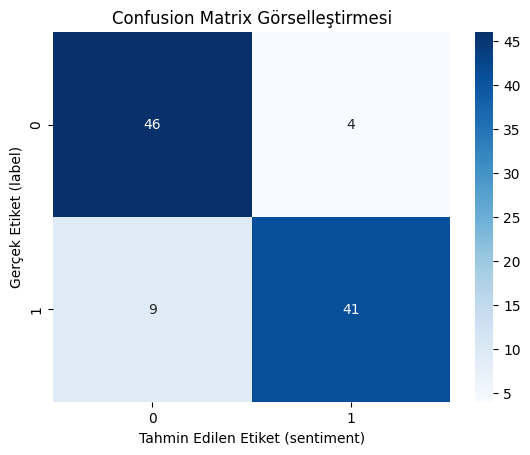

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Etiket (sentiment)')
plt.ylabel('Gerçek Etiket (label)')
plt.title('Confusion Matrix Görselleştirmesi')
plt.show()


Bu çalışmada ilk olarak, kural tabanlı bir duygu analiz aracı olan **VADER (Valence Aware Dictionary and sEntiment Reasoner)** kullanıldı. VADER, özellikle sosyal medya ve kullanıcı yorumları gibi kısa metinlerde etkili çalışan, kelime sözlüğü ve belirli kurallara dayalı bir analiz yöntemidir.

Uygulama sonucunda:
- **Doğruluk oranı:** %87
- **Negatif sınıf (0) için recall:** %92
- **Pozitif sınıf (1) için precision:** %91

Bu sonuçlar, VADER’ın yorumları oldukça dengeli bir şekilde sınıflandırabildiğini göstermektedir. Ancak VADER veriye özel olarak eğitilmediği için, daha karmaşık ifadelerde veya ironi gibi ince duygusal geçişlerde yetersiz kalabilir.


## Transformers ile Duygu Analizi

VADER gibi kural tabanlı yöntemlerin aksine, Transformers tabanlı modeller, dilin bağlamını anlayabilen ve çok büyük veri kümeleri üzerinde önceden eğitilmiş derin öğrenme modelleridir. Bu bölümde, Hugging Face kütüphanesi üzerinden erişilebilen bir Transformer modelini kullanarak yorumlar üzerinde duygu analizi gerçekleştireceğim.

Seçilen model, kullanıcı yorumları gibi kısa metinlerde olumlu (positive) veya olumsuz (negative) duyguları sınıflandırmak üzere ince ayar (fine-tune) edilmiş bir dil modelidir. Bu sayede model, sözcüklerin bağlam içindeki anlamını daha derinlikli şekilde analiz edebilir.

In [18]:
from transformers import pipeline

# Sentiment analiz pipeline'ı
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [19]:
df["transformer_sentiment"] = df["reviews_clean"].apply(lambda x: classifier(x)[0]['label'])

Bu adımın sonunda transformer_sentiment sütununda "POSITIVE" veya "NEGATIVE" etiketleri olacak.

In [20]:
df["transformer_sentiment_label"] = df["transformer_sentiment"].map({"NEGATIVE": 0, "POSITIVE": 1})


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(df["label"], df["transformer_sentiment_label"]))
print("\nClassification Report:\n", classification_report(df["label"], df["transformer_sentiment_label"]))
print("\nAccuracy Score:", accuracy_score(df["label"], df["transformer_sentiment_label"]))


Confusion Matrix:
 [[41  9]
 [ 0 50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        50
           1       0.85      1.00      0.92        50

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100


Accuracy Score: 0.91


Transformers tabanlı modelin duygu analizi performansı oldukça başarılı sonuçlar verdi:

Doğruluk oranı: %91

Olumlu sınıf için recall: %100 → Model, tüm pozitif yorumları doğru şekilde tanımladı.

Olumsuz sınıf için precision: %100 → Modelin negatif olarak tahmin ettiği tüm örnekler gerçekten negatifti.

Bu sonuçlar, Transformer mimarisinin dilin bağlamını anlamadaki gücünü net bir şekilde göstermektedir. Özellikle VADER’ın bazı pozitif yorumları kaçırdığı durumlarda, Transformer modeli yüksek başarıyla doğru sınıflandırmalar yapmıştır.



## Genel Değerlendirme
VADER, küçük veri setlerinde ve hızlı analiz gereken durumlarda oldukça etkili, basit ve kullanışlıdır. Ancak bağlamsal anlamı sınırlı yakalayabilir.

Transformers tabanlı modeller (özellikle fine-tuned versiyonlar), yorumların anlamını daha derinlemesine anlayabildiğinden özellikle ince duygu geçişlerinde çok daha başarılıdır.

Sonuç olarak: Bu örnek üzerinde Transformer modeli, daha yüksek doğruluk ve özellikle pozitif yorumları kaçırmama konusunda daha başarılı performans sergilemiştir.

